# КП  (Физика + Математика + Питон)
-----------

#### Выполнил:

 Студент группы М8О-103М-20 Воробьев Алексей Вячеславович

------------------

#### Проверили:

Ципенко Антон Владимирович

Иванов Игорь Эдуардович

Поповкин Александр Викторович

-----------------------

### Подключение необходимых библиотек:

In [1]:
import math
import matplotlib
from matplotlib import pyplot as plt

------------
## Исходные данные:
----------------
### Табличные значения:
#### 1. Тепловой поток излучения от Солнца:

In [2]:
q = 1322

#### 2. Удельная теплота плавления льда:

In [3]:
lyam_led = 330*(10**3)

#### 3. Коэффициент теплопроводности воздуха:

In [4]:
lyam_vozd = 94.48*(10**(-6))

#### 4. Удельная теплоемкость льда:

In [5]:
C_led = 2.11

#### 5. Удельная теплоемкость пара:

In [6]:
C_par = 2.0784

#### 6. Энтальпия воды:

In [7]:
I_voda = 83.8*(10**3)

#### 7. Энтальпия водяного пара:

In [8]:
I_par = 2532*(10**3)

#### 8. Динамическая вязкость пара:

In [9]:
mu_par = 9.746*(10**(-6))

#### 9. Динамическая вязкость воздуха:

In [10]:
mu_vozd = 18.12*(10**(-6))

#### 10. Кинематическая вязкость пара:

In [11]:
nu_par = 563.7*(10**(-6))

#### 11. Кинематическая вязкость воздуха:

In [12]:
nu_vozd = 15.06*(10**(-6))

#### 12. Плотность воздуха при температуре воды:

In [13]:
ro_vozd_T_voda = 1.293

#### 13. Плотность воздуха при температуре воздуха:

In [14]:
ro_vozd_T_vozd = 1.205

#### 14. Плотность насыщенных паров воды при температуре воды:

In [15]:
ro_parnas_T_voda = 0.00484

#### 15. Плотность насыщенных паров воды при температуре воздуха:

In [16]:
ro_parnas_T_vozd = 0.01729

#### 16. Плотность льда:

In [17]:
ro_led = 918.9

---------------------
### Значения, которые мы задаем сами:
#### 17. Число Шервуда:

In [18]:
Sc = 1

#### 18. Число Нуссельта:

In [19]:
Nu = 2

#### 19. Коэффициент отражения солнечных лучей:

In [20]:
R_otr = 0.85

#### 20. Энтальпия воды:

In [21]:
I_voda = 83.8*(10**3)

#### 21. Энтальпия водяного пара:

In [22]:
I_par = 2532*(10**3)

#### 22. Температура льда:

In [23]:
T_led = 263.15

#### 23. Температура воды:

In [24]:
T_voda = 273.15

#### 24. температура воздуха:

In [25]:
T_vozd = 293.15

#### 25. Относительная влажность:

In [26]:
fi = 0.6

#### 26. Скорость движения воздуха:

In [27]:
v = 1

-------------------
### Рассмотрим СУ#2. Вычислим (11)-(17):
#### (17) Плотность паров воды при температуре воздуха:

In [28]:
ro_par_T_vozd = (fi)*(ro_parnas_T_vozd)

#### (16) Средняя массовая доля пара в объеме ячейки, занимаемой сплошной фазой (газом):

In [ ]:
Ya = (ro_par_T_vozd)/(ro_par_T_vozd + ro_vozd_T_vozd)

#### (15) Плотность паров воды при температуре воды:

In [30]:
ro_par_T_voda = (fi)*(ro_parnas_T_voda)

#### (14) Массовая доля пара на повер-ти шара, опред. давлением насыщ. пара при темп-ре воды:

In [31]:
Yd = (ro_parnas_T_voda)/(ro_par_T_voda + ro_vozd_T_voda)

#### (13) Коэффициент, характеризующий удельную скорость испарения:

In [32]:
PH = math.log(( 1 + (Yd - Ya)/(1 - Yd) ))

#### (12) Динамическая вязкость смеси (воздух + пар):

In [33]:
mu_v_p = Ya*mu_par + (1 - Ya)*mu_vozd

#### (11) Кинематическая вязкость смеси (воздух + пар):

In [34]:
nu_v_p = Ya*nu_par + (1 - Ya)*nu_vozd

------------------
### Рассмотрим СУ#3. Введем и вычислим ряд коэффициентов:

In [35]:
C1 = (ro_led*math.pi)/2
C7 = 2*math.pi*PH*(mu_v_p)*(1/Sc)
C8 = 0.552*math.pi*PH*mu_v_p*(Sc**(-2/3))*((v/nu_v_p)**(1/2))

-----------------------
## Реализация Метода Рунге-Кутты 4-ого порядка
для нахождения решения уравнения (2):
d(d_shara)/dt = C7/(C1d_shara) + (C8/(C1(d_shara**(1/2)))
-----------------
### Создадим шаблон уравнения (2):

In [36]:
def f(t, d):
    d = C7/(C1*d) + C8/(C1*(d**(1/2)))
    return d

-------------
### Создадим шаблоны функций, зависящих от времени:
#### 1. Масса шара (m):

In [37]:
def m2(d):
    m = ro_led*((math.pi*(d**3))/6)
    return m

#### 2. Число Шервуда (Sh):

In [38]:
def Sh2(d):    
    Sh = 2 + 0.552*(((v*d)/(nu_v_p))**(1/2))*(Sc**(1/3))
    return Sh

----------------
### Инициализируем основные переменные, с помощью которых будем строить графики:
#### 1. Список (совокупность) координат по оси абсцисс = время (t):

In [39]:
x = []

#### 2. Список (совокупность) координат по оси ординат = диаметр шара (d):

In [40]:
y = []

#### 3. Список (совокупность) координат по оси ординат = масса шара (m):

In [41]:
massa = []

#### 4. Список (совокупность) координат по оси ординат = число Шервуда (Sh):

In [42]:
Sher = []

--------------
### Создадим шаблон функции Рунге-Кутты:

In [43]:
def runge(t, d, h):
    
    start_m = m2(d) #начальная масса шара
    
    start_Sh = Sh2(d) #начальное значение числа Шервуда
    
    while (d > 0.01):
        
        x.append(t/3600)
        y.append(d*100)
        massa.append(m2(d)*1000)
        Sher.append(Sh2(d))
        
        K1 = f(t, d)
        K2 = f(t + h/2, d + K1/2)
        K3 = f(t + h/2, d + K2/2)
        K4 = f(t + h, d + K3)
        
        delta_d = (1/6)*h*(K1 + 2*K2 + 2*K3 + K4)
        d = d + delta_d
        t = t + h
        
        m = m2(d)
        Sh = Sh2(d)
    
    return {'t_sec': t, 't': t/3600, 'd': d*100, 'm': m*1000, 
            'Sh': Sh, 'start_m': start_m*1000, 'start_Sh': start_Sh}

-------------
### Вызов функции Рунге-Кутты:

In [44]:
r = runge(0, 0.02, 0.05)

----------------
### Графики

#### График зависимости диаметра шара (d) от времени (t):

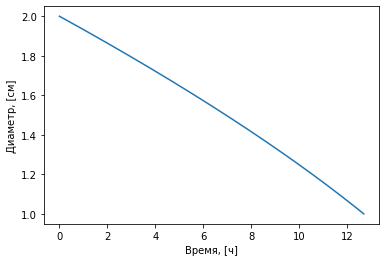

In [45]:
plt.plot(x, y)
plt.xlabel('Время, [ч]')
plt.ylabel('Диаметр, [см]')
plt.show()

#### График зависимости массы (m) от времени (t):

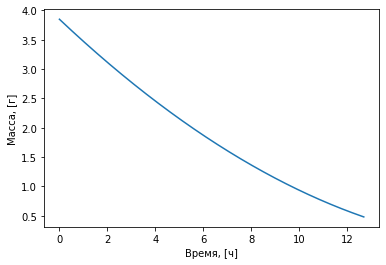

In [46]:
plt.plot(x, massa)
plt.xlabel('Время, [ч]')
plt.ylabel('Масса, [г]')
plt.show()

#### График зависимости числа Шервуда (Sh) от диаметра шара (d):

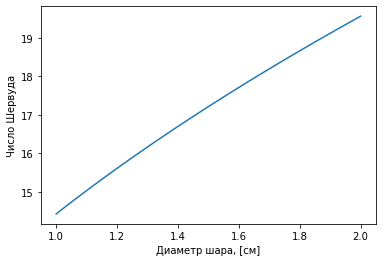

In [47]:
plt.plot(y, Sher)
plt.xlabel('Диаметр шара, [см]')
plt.ylabel('Число Шервуда')
plt.show()

----------------------
### Сравнение начальных и конечных значений основных параметров: 

#### Время:

In [48]:
print('Start t = 0.0 sec\n')
print(f'Finally t = {int(r["t"])} hours and {int((r["t"] - int(r["t"]))*60)} minutes')
print(f'Or just in sec, t = {r["t_sec"]}')

Start t = 0.0 sec

Finally t = 12 hours and 41 minutes
Or just in sec, t = 45682.0500004151


#### Диаметр шара:

In [49]:
print('Start d = 2 sm')
print(f'Finally d = {r["d"]} sm\n')

Start d = 2 sm
Finally d = 0.9999987928479176 sm



#### Масса шара:

In [50]:
print(f'Start m = {r["start_m"]} g')
print(f'Finally m = {r["m"]} g\n')

Start m = 3.849079319178215 g
Finally m = 0.4811331724903368 g



#### Число Шервуда:

In [51]:
print(f'Start Sh = {r["start_Sh"]}')
print(f'Finally Sh = {r["Sh"]}')

Start Sh = 19.569020467994672
Finally Sh = 14.423166013392132


-------------
### Вывод некоторых постоянных значений:

#### Динамическая вязкость смеси (воздух + пар):

In [52]:
print(mu_v_p)

1.8048522515702985e-05


#### Коэффициент, характеризующий удельную скорость испарения:

In [53]:
print(PH)

-0.004830444910439047
